# Groundy Eigenvalue

## We are testing the conjecture that $\Gamma(G) < \lceil \Lambda(G) + 1 \rceil$ 


Testing with size:  1
Tested with 1 graphs

Testing with size:  2
Tested with 1 graphs

Testing with size:  3
Tested with 2 graphs

Testing with size:  4


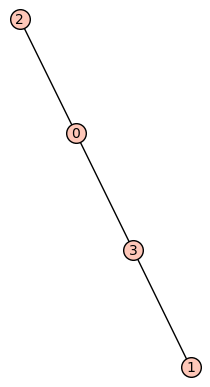

Tested with 6 graphs

Testing with size:  5


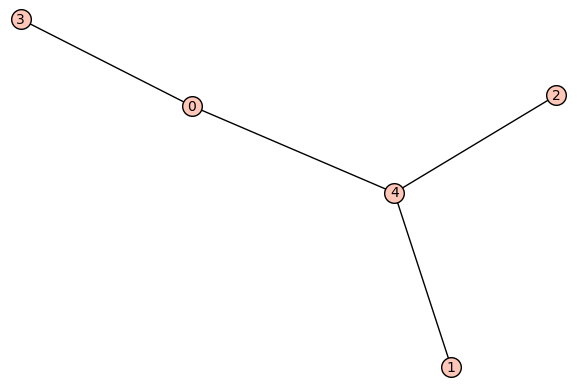

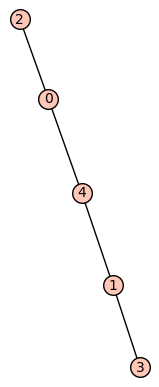

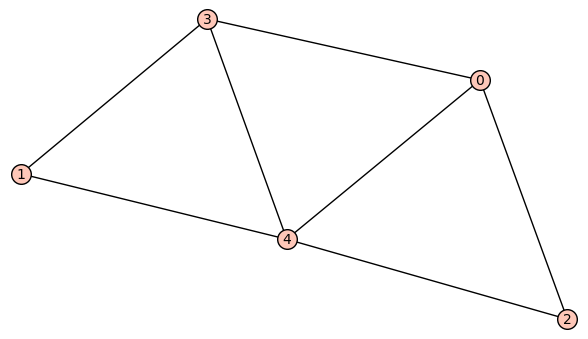

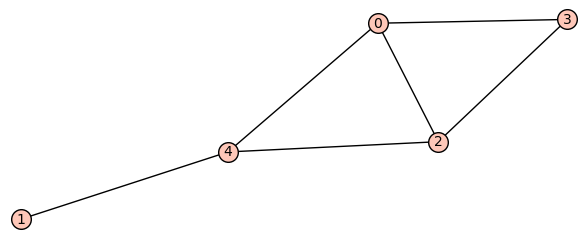

Tested with 21 graphs

Testing with size:  6


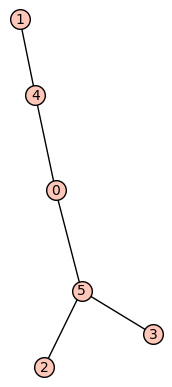

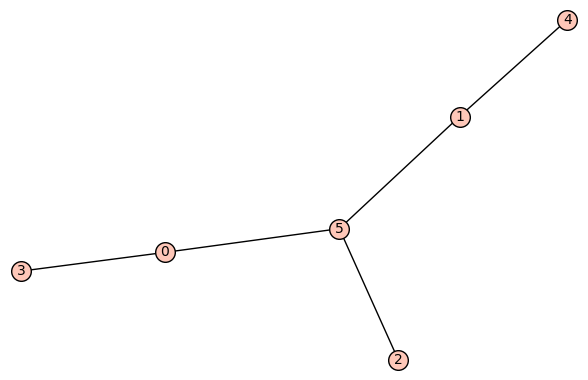

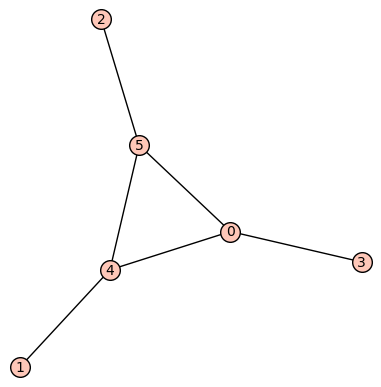

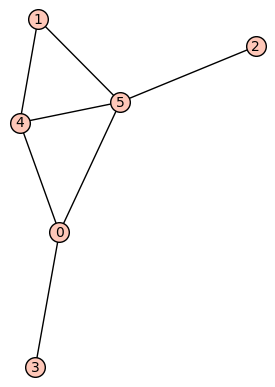

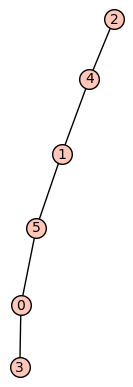

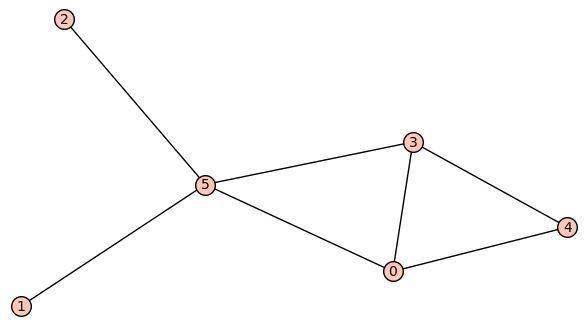

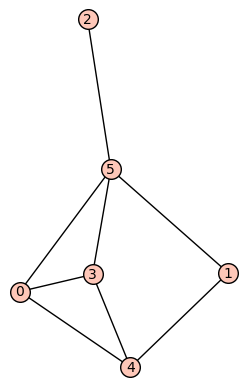

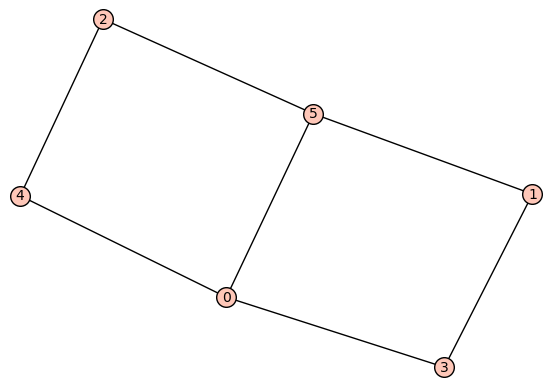

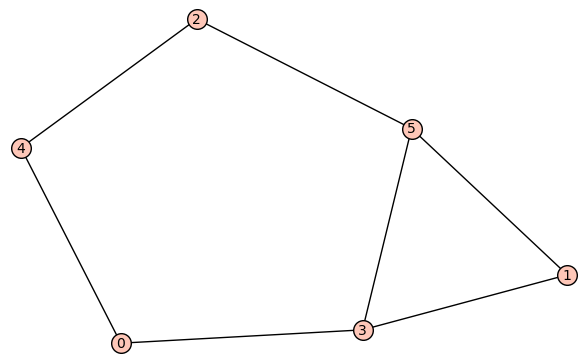

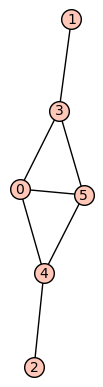

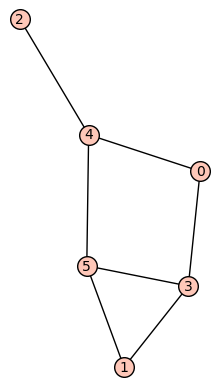

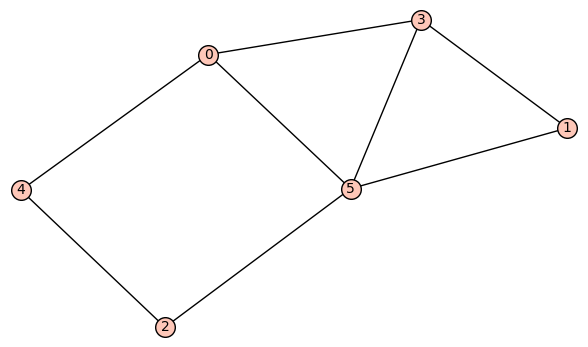

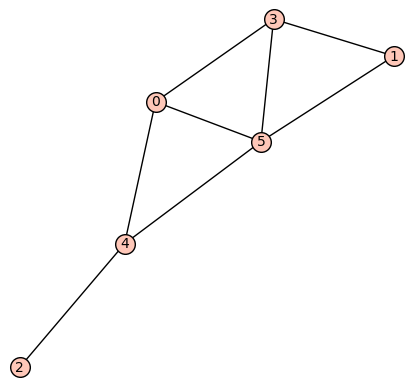

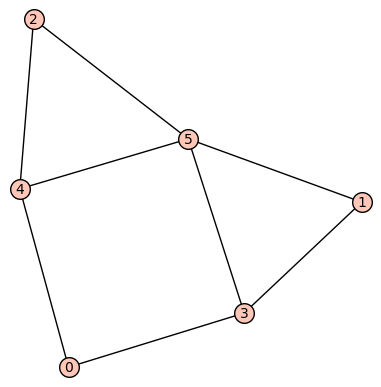

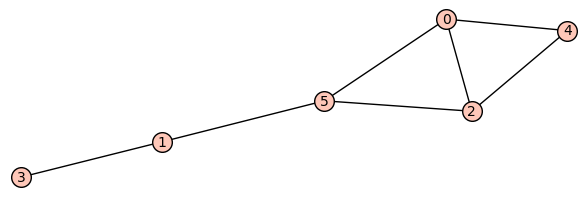

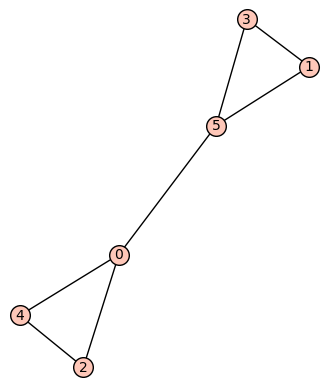

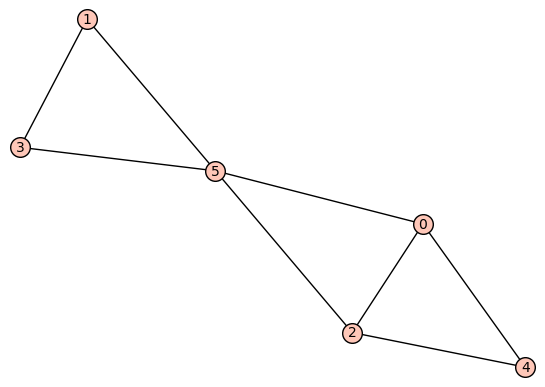

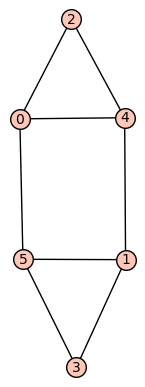

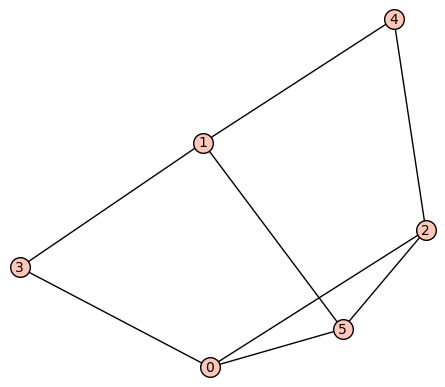

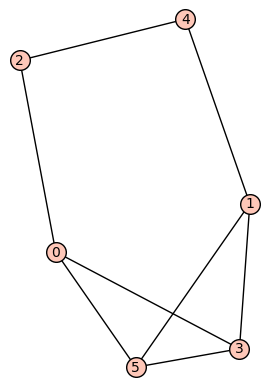

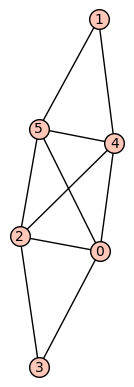

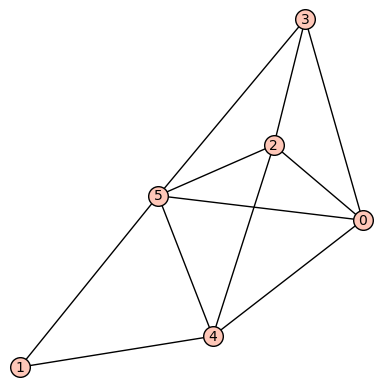

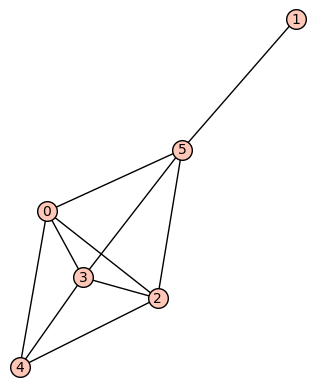

Tested with 112 graphs

Testing with size:  7


In [ ]:
from sage.graphs.graph_coloring import grundy_coloring

min_size = 1
max_size = 8

for size in range(min_size, max_size + 1):
    print("\nTesting with size: ", size)
    cnt = 0
    
    for G in graphs(size):
        if not G.is_connected():
            continue

        if cnt and cnt % 1000 == 0:
            print(cnt)
            
        grundy = grundy_coloring(G, len(G))

        spec = G.spectrum()
        spec.sort()
        max_eig = spec[-1]

        if max_eig + 1 < grundy:
            P = G.plot()
            P.show()
        
        cnt += 1
    print("Tested with", cnt, "graphs")

## Findings eigenvalues (worst case?)

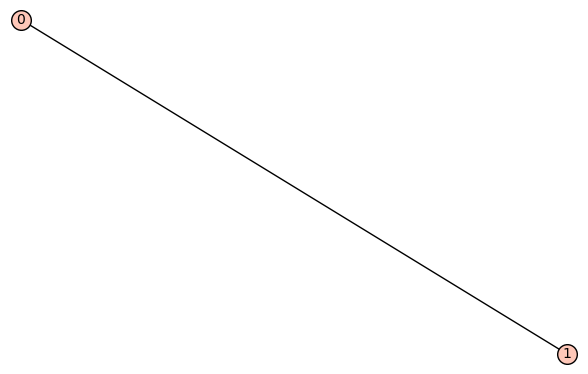

In [1]:
G1 = Graph(sparse=True)
G1.add_edges([(0, 1, 1)])
G1.plot().show()

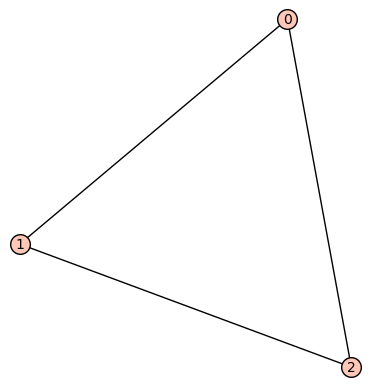

[          0           1 1/2*sqrt(2)]
[          1           0 1/2*sqrt(2)]
[1/2*sqrt(2) 1/2*sqrt(2)           0]

In [2]:
G2 = G1
G2.add_edges([(2, 1, 1/sqrt(2)), (2, 0, 1/sqrt(2))])
G2.plot().show()
G2.weighted_adjacency_matrix()

In [12]:
S = matrix([[1, 0, 0, 0], [0, 1, 0, 0], [0, 0, 1/sqrt(2), 1/sqrt(2)]])
P = Graph({0:[1, 2], 1:[0, 3]})
Q = S * P.adjacency_matrix() * S.transpose()
print("Q:", Q.eigenvalues())
print("P:", P.spectrum())

Q: [-1/2*sqrt(5) + 1/2, 1/2*sqrt(5) + 1/2, -1]
P: [1.618033988749895?, 0.618033988749895?, -0.618033988749895?, -1.618033988749895?]


In [1]:
def atom_quotient_matrix_coutinho(n):
    A = matrix(SR, n)
    for i in range(2, n+1):
        for j in range(1, i):
            A[i-1, j-1] = A[j-1, i-1] = 1/sqrt(2**(i-2));
    return A

In [2]:
A = atom_quotient_matrix_coutinho(6)
print(A)

[          0           1 1/2*sqrt(2)         1/2 1/4*sqrt(2)         1/4]
[          1           0 1/2*sqrt(2)         1/2 1/4*sqrt(2)         1/4]
[1/2*sqrt(2) 1/2*sqrt(2)           0         1/2 1/4*sqrt(2)         1/4]
[        1/2         1/2         1/2           0 1/4*sqrt(2)         1/4]
[1/4*sqrt(2) 1/4*sqrt(2) 1/4*sqrt(2) 1/4*sqrt(2)           0         1/4]
[        1/4         1/4         1/4         1/4         1/4           0]


In [3]:
import numpy as np
A = atom_quotient_matrix_coutinho(100)
A = matrix(RR, A)
max(np.linalg.eig(A)[0])

2.50306089374004

## Matrix we should really try to use

Worst case?


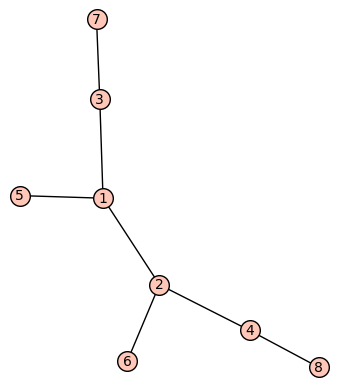

S matrix:
 [[1.         0.         0.         0.        ]
 [0.         1.         0.         0.        ]
 [0.         0.         0.70710678 0.        ]
 [0.         0.         0.70710678 0.        ]
 [0.         0.         0.         0.5       ]
 [0.         0.         0.         0.5       ]
 [0.         0.         0.         0.5       ]
 [0.         0.         0.         0.5       ]]

S^T * S matrix:
 [[1. 0. 0. 0.]
 [0. 1. 0. 0.]
 [0. 0. 1. 0.]
 [0. 0. 0. 1.]]


In [57]:
G = Graph({1:[2, 3, 5], 2:[4, 6], 3:[7], 4:[8]})
print("Worst case?")
G.plot().show()
G.spectrum()
S = np.zeros([8, 4])
S[0, 0] = 1
S[1, 1] = 1
S[2, 2] = 1/sqrt(2)
S[3, 2] = 1/sqrt(2)
S[4, 3] = 1/2
S[5, 3] = 1/2
S[6, 3] = 1/2
S[7, 3] = 1/2
print("S matrix:\n", S)
print()
print("S^T * S matrix:\n", S.transpose()@S)

#### Quotient matrix

In [49]:
Q = S.T @ G.adjacency_matrix() @ S; Q

Quotient:
 [[0.         1.         0.70710678 0.5       ]
 [1.         0.         0.70710678 0.5       ]
 [0.70710678 0.70710678 0.         0.70710678]
 [0.5        0.5        0.70710678 0.        ]]


Because of interlacing, $\Lambda(A) \geq \Lambda(Q)$

In [55]:
print("lambda(A): ", max(np.linalg.eig(G.adjacency_matrix())[0]))
print("lambda(Q): ", max(np.linalg.eig(Q)[0]))


lambda(A):  2.0952939852239116
lambda(Q):  2.0781625873293303


Eigenvectors

In [67]:
matrix(Q).eigenvectors_right()

[(2.0781625873293303,
  [(-0.5298990988806637, -0.5298990988806638, -0.5059366554786334, -0.42713228706574696)],
  1),
 (-0.31544880690757215,
  [(-0.4324866297626544, -0.4324866297626544, 0.2818451988548682, 0.7392387395392243)],
  1),
 (-0.999999999999999,
  [(-0.7071067811865475, 0.7071067811865475, -1.66507743021555e-16, 8.302548636517909e-17)],
  1),
 (-0.7627137804217586,
  [(0.17933839544838512, 0.1793383954483851, -0.8152247447946819, 0.5206573684395939)],
  1)]

### Construct S matrix and worst case graph

In [28]:
def atom_graph(n):
    G = Graph(sparse=True)
    for i in range(0, n):
        for j in range(2**i):
            G.add_edge((j, 2**i + j));
    return G

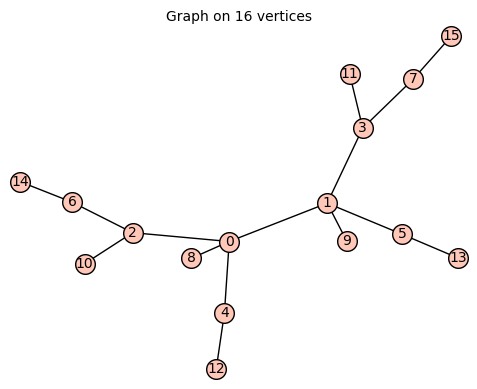

In [32]:
atom_graph(4)

In [12]:
def partition_matrix(n, ring=SR):
    S = matrix(ring, 2**n, n+1)
    S[0, 0] = 1
    for row in range(1, 2**n):
        col = 1 + int(log(row, 2))
        S[row, col] = 1/sqrt(2**(col-1))
    return S

#### Checking if matrix is unitary

In [13]:
S = partition_matrix(4); S

[          1           0           0           0           0]
[          0           1           0           0           0]
[          0           0 1/2*sqrt(2)           0           0]
[          0           0 1/2*sqrt(2)           0           0]
[          0           0           0         1/2           0]
[          0           0           0         1/2           0]
[          0           0           0         1/2           0]
[          0           0           0         1/2           0]
[          0           0           0           0 1/4*sqrt(2)]
[          0           0           0           0 1/4*sqrt(2)]
[          0           0           0           0 1/4*sqrt(2)]
[          0           0           0           0 1/4*sqrt(2)]
[          0           0           0           0 1/4*sqrt(2)]
[          0           0           0           0 1/4*sqrt(2)]
[          0           0           0           0 1/4*sqrt(2)]
[          0           0           0           0 1/4*sqrt(2)]

In [170]:
S.transpose() * S

[1 0 0 0 0]
[0 1 0 0 0]
[0 0 1 0 0]
[0 0 0 1 0]
[0 0 0 0 1]

#### Quotient matrix

In [171]:
S = partition_matrix(2)
G = atom_graph(2)
S.transpose() * G.adjacency_matrix() * S

[          0           1 1/2*sqrt(2)]
[          1           0 1/2*sqrt(2)]
[1/2*sqrt(2) 1/2*sqrt(2)           0]

In [172]:
S = partition_matrix(3)
G = atom_graph(3)
S.transpose() * G.adjacency_matrix() * S

[          0           1 1/2*sqrt(2)         1/2]
[          1           0 1/2*sqrt(2)         1/2]
[1/2*sqrt(2) 1/2*sqrt(2)           0 1/2*sqrt(2)]
[        1/2         1/2 1/2*sqrt(2)           0]

In [173]:
S = partition_matrix(4)
G = atom_graph(4)
S.transpose() * G.adjacency_matrix() * S

[          0           1 1/2*sqrt(2)         1/2 1/4*sqrt(2)]
[          1           0 1/2*sqrt(2)         1/2 1/4*sqrt(2)]
[1/2*sqrt(2) 1/2*sqrt(2)           0 1/2*sqrt(2)         1/2]
[        1/2         1/2 1/2*sqrt(2)           0 1/2*sqrt(2)]
[1/4*sqrt(2) 1/4*sqrt(2)         1/2 1/2*sqrt(2)           0]

#### Eigenvalues

Notice that the partition created at the $S$ matrix is not equitable, therefore, the radio of the quotient graph does not need to be the same as the radio of the original eigenvalue

In [175]:
for n in range(1, 11):
    S = matrix(RR, partition_matrix(n))
    G = atom_graph(n)
    Q = S.transpose() * G.adjacency_matrix() * S
    
    print("N =", n)
    print("Original graph eigenvalue: ", max(np.linalg.eig(G.adjacency_matrix())[0]))
    print("Quotient graph eigenvalue: ", max(np.linalg.eig(Q)[0]))
    print()

N = 1
Original graph eigenvalue:  1.0
Quotient graph eigenvalue:  1.0

N = 2
Original graph eigenvalue:  1.6180339887498942
Quotient graph eigenvalue:  1.6180339887498953

N = 3
Original graph eigenvalue:  2.0952939852239116
Quotient graph eigenvalue:  2.0781625873293303

N = 4
Original graph eigenvalue:  2.4959439998341875
Quotient graph eigenvalue:  2.4396809230314807

N = 5
Original graph eigenvalue:  2.847169959075718
Quotient graph eigenvalue:  2.73205080756888

N = 6
Original graph eigenvalue:  3.1632959308069992
Quotient graph eigenvalue:  2.973090550711085

N = 7
Original graph eigenvalue:  3.452906976461293
Quotient graph eigenvalue:  3.1746829735223114

N = 8
Original graph eigenvalue:  3.7216080303711423
Quotient graph eigenvalue:  3.3452258234022043

N = 9
Original graph eigenvalue:  3.9732887093148985
Quotient graph eigenvalue:  3.490886573593907

N = 10
Original graph eigenvalue:  4.210774699734426
Quotient graph eigenvalue:  3.6163214739123326



In [210]:
print(atom_graph(3).charpoly())
max(atom_graph(3).charpoly().roots(ring=SR))

x^8 - 7*x^6 + 13*x^4 - 7*x^2 + 1


(1/2*sqrt(sqrt(5) + 2*sqrt(7/2*sqrt(5) + 19/2) + 7), 1)

In [250]:
n = 3
S = partition_matrix(n)
G = atom_graph(n)
Q = S.transpose() * G.adjacency_matrix() * S
Q.charpoly()

x^4 - 3*x^2 - 5/2*x - 1/2

In [243]:
n = 4
S = partition_matrix(n)
G = atom_graph(n)
Q = S.transpose() * G.adjacency_matrix() * S
max(Q.eigenvalues())

-1/2*(1/72*I*sqrt(37)*sqrt(3) + 251/216)^(1/3)*(I*sqrt(3) + 1) - 5/9*(-I*sqrt(3) + 1)/(1/72*I*sqrt(37)*sqrt(3) + 251/216)^(1/3) + 1/3

In [251]:
n = 6
S = partition_matrix(n)
G = atom_graph(n)
Q = S.transpose() * G.adjacency_matrix() * S
v = np.ones([])
Q

[          0           1 1/2*sqrt(2)         1/2 1/4*sqrt(2)         1/4 1/8*sqrt(2)]
[          1           0 1/2*sqrt(2)         1/2 1/4*sqrt(2)         1/4 1/8*sqrt(2)]
[1/2*sqrt(2) 1/2*sqrt(2)           0 1/2*sqrt(2)         1/2 1/4*sqrt(2)         1/4]
[        1/2         1/2 1/2*sqrt(2)           0 1/2*sqrt(2)         1/2 1/4*sqrt(2)]
[1/4*sqrt(2) 1/4*sqrt(2)         1/2 1/2*sqrt(2)           0 1/2*sqrt(2)         1/2]
[        1/4         1/4 1/4*sqrt(2)         1/2 1/2*sqrt(2)           0 1/2*sqrt(2)]
[1/8*sqrt(2) 1/8*sqrt(2)         1/4 1/4*sqrt(2)         1/2 1/2*sqrt(2)           0]

### Star graph

In [ ]:
def star_weighted_graph(n):
    G = Graph(sparse=True)
    for i in range(0, n):
        for j in range(2**i):
            G.add_edge((j, 2**i + j));
    return G

In [264]:
def double_star_eig(t):
    N = 2*t
    a = b = (N-2)//2
    print(N, a)
    return sqrt(((N-1) + sqrt((N-1)**2 - 4*a*b))/2)

In [265]:
double_star_eig(2)

4 1


sqrt(1/2*sqrt(5) + 3/2)

In [270]:
graphs.PathGraph(4).spectrum()

[1.618033988749895?, 0.618033988749895?, -0.618033988749895?, -1.618033988749895?]

In [17]:
def quotient_matrix(n, ring=SR):
    S = matrix(ring, n)
    for row in range(0, n):
        for col in range(row+1, n):
            delta = col-row
            if row == 0:
                delta -= 1
            a = 2^(delta/2)    
            S[row, col] = S[col, row] = 1/a
    return S

In [27]:
A = quotient_matrix(100, RR)
max(np.linalg.eig(A)[0])

4.78747696097492